In [1]:
%matplotlib widget
import gudhi as gd
from gudhi import hera
import matplotlib.pyplot as plt
import numpy as np
#from igraph import *
from scipy import sparse
#import ripser

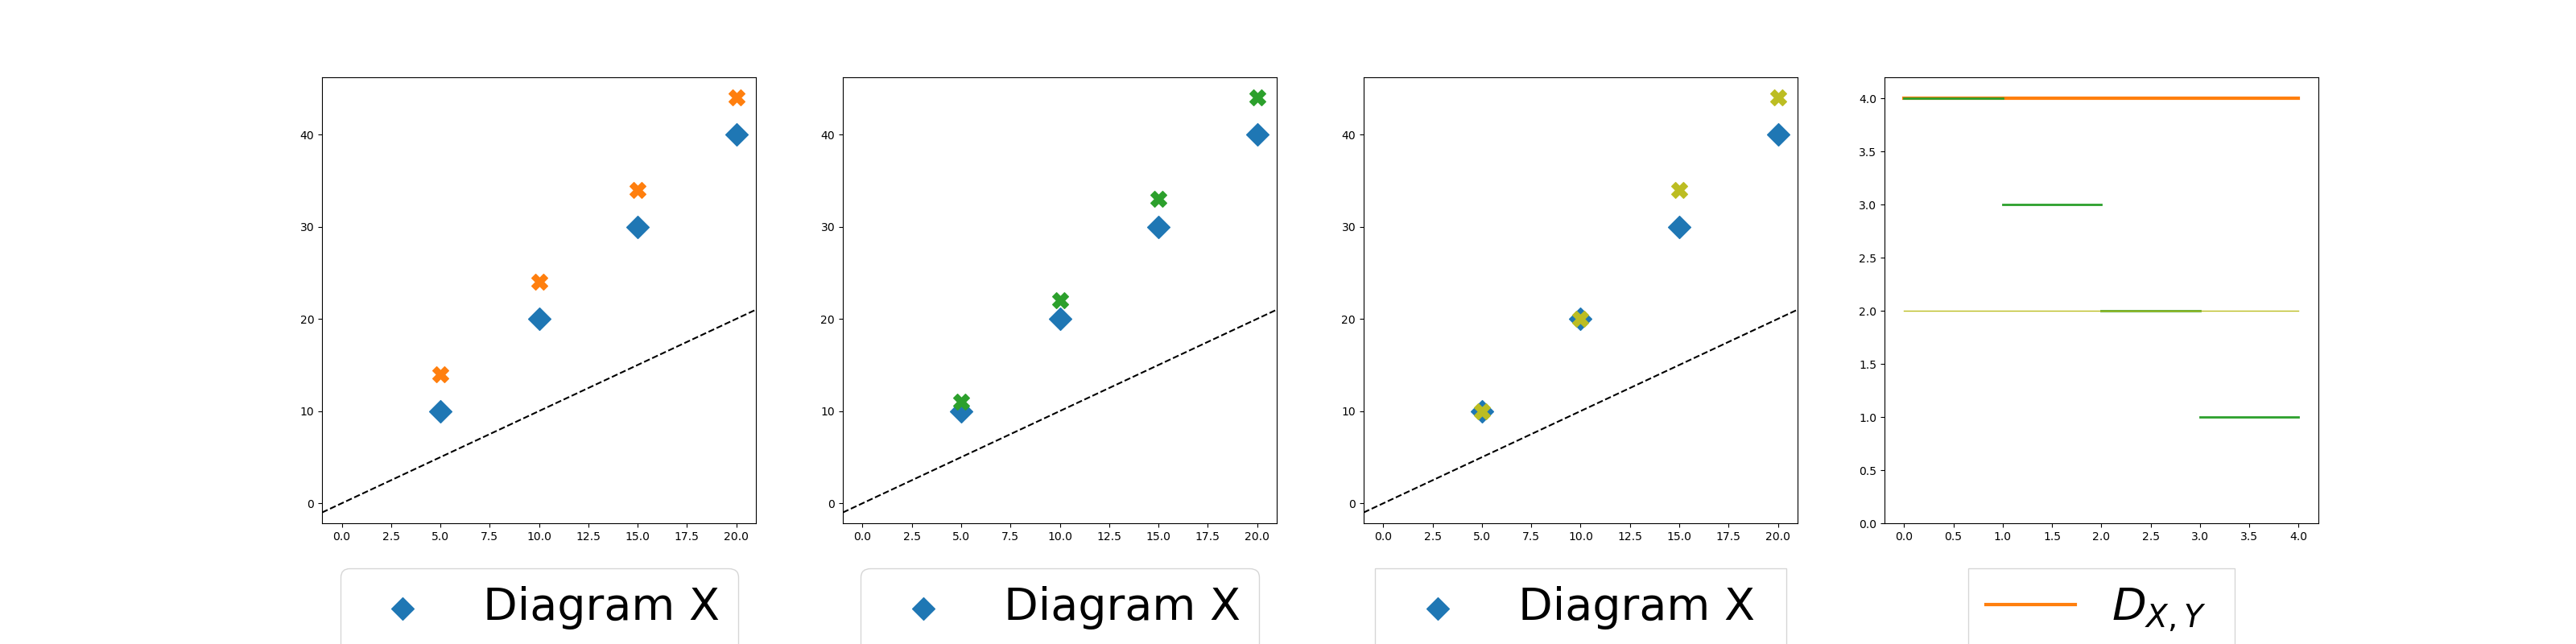

In [2]:
#set up parameters
n_points = 4

#Create artificial persistence diagrams
Dgm1x = np.array([5*x for x in range(1,n_points+1)])
Dgm1y = np.array([10*x for x in range(1,n_points+1)])
Dgm2x = np.array([5*x for x in range(1,n_points+1)])
Dgm2y = np.array([10*x+x for x in range(1,n_points+1)])
Dgm3x = np.array([5*x for x in range(1,n_points+1)])
Dgm3y = np.array([10*x+(n_points) for x in range(1,n_points+1)])
Dgm4x = np.array([5*x for x in range(1,n_points+1)])
Dgm4y = np.array([10*x+4*np.floor((x-1)/(n_points/2)) for x in range(1,n_points+1)])


Dgm1 = np.array([(Dgm1x[i],Dgm1y[i]) for i in range(0,n_points)])
Dgm2 = np.array([(Dgm2x[i],Dgm2y[i]) for i in range(0,n_points)])
Dgm3 = np.array([(Dgm3x[i],Dgm3y[i]) for i in range(0,n_points)])
Dgm4 = np.array([(Dgm4x[i],Dgm4y[i]) for i in range(0,n_points)])


#Plot the PDs
f, axs = plt.subplots(1,4, figsize=(32, 8))
ax = plt.subplot(141)
plt.scatter(Dgm1x, Dgm1y, marker = 'D', label = 'Diagram X', s = 200)
plt.scatter(Dgm3x, Dgm3y, marker = 'X', label = 'Diagram Y', s = 200)
plt.axline((0,0),slope=1, c='k', ls='--')
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, ncol=1, prop={'size': 40} )


ax = plt.subplot(142)
plt.scatter(Dgm1x, Dgm1y, marker = 'D', label = 'Diagram X', s=200)
plt.scatter(Dgm2x, Dgm2y, marker = 'X', c='tab:green', label = 'Diagram Z', s=200)
plt.axline((0,0),slope=1, c='k', ls='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, ncol=1, prop={'size': 40} )


ax = plt.subplot(143)
plt.scatter(Dgm1x, Dgm1y, marker = 'D', label = 'Diagram X', s=200)
plt.scatter(Dgm4x, Dgm4y, marker = 'X', c='tab:olive', label = 'Diagram W', s=200)
plt.axline((0,0),slope=1, c='k', ls='--')
plt.legend(loc="upper left", prop={'size': 32})
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=False, ncol=1, prop={'size': 40} )


#compute the D_{X,Y} values
d_vals = np.linspace(0,n_points,n_points+1)
r_vals12 = [gd.prokhorov_distance(Dgm1, Dgm2, np.array([r])) for r in d_vals]
r_vals13 = [gd.prokhorov_distance(Dgm1, Dgm3, np.array([r])) for r in d_vals]
r_vals14 = [gd.prokhorov_distance(Dgm1, Dgm4, np.array([r])) for r in d_vals]

#Plot the D_{X,Y}
ax2 = plt.subplot(144)
for i in range(1,n_points+1):
    plt.plot((r_vals13[i],r_vals13[i-1]),(i, i), c='tab:orange', ls='-', linewidth = 3.0, label = '$D_{X,Y}$')
    plt.plot((r_vals12[i],r_vals12[i-1]),(i, i), c='tab:green', ls='-', linewidth = 2.0, label = '$D_{X,Z}$')
    plt.plot((r_vals14[i],r_vals14[i-1]),(i, i), c='tab:olive', ls='-', linewidth = 1.0, label = '$D_{X,W}$')
#plt.axline((0,0),slope=1, c='k', ls='--', label = "id")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax2.set_ylim((0,4.2))
box = ax2.get_position()
ax2.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax2.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=False, ncol=1, prop={'size': 40} )
#plt.legend(by_label.values(), by_label.keys(), loc="lower left", prop={'size': 32})
plt.savefig("BottleneckProfiles.png")

plt.show()


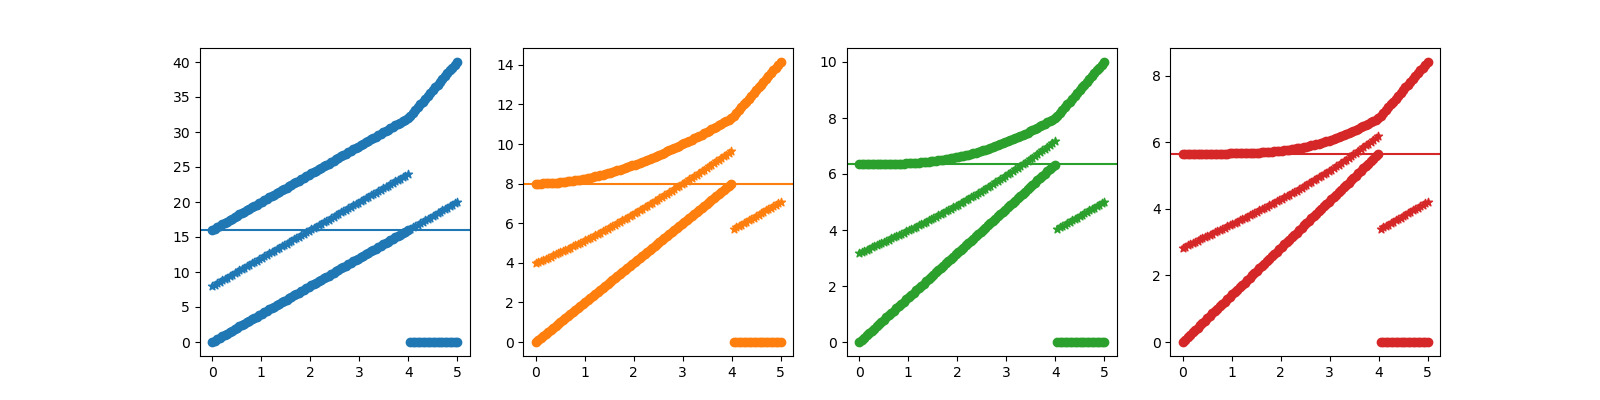

In [3]:
f,ax = plt.subplots(1,4, figsize=(16,4))
t = np.linspace(0,5,100)
Ix=Dgm1
Iy=Dgm3
Dt = np.array([gd.bottleneck_profile(Ix,Iy,t0) for t0 in t])
dB = gd.bottleneck_distance(Ix,Iy)
cols = ["tab:blue", "tab:orange", "tab:green", "tab:red"]
for p in range(1,5):
    W_p = gd.hera.wasserstein_distance(Ix, Iy, order = p, internal_p = float("inf"))
    ax[p-1].axline((0,W_p), slope=0, label = "$W_{}^{}$".format(p,p), c=cols[p-1])
    ax[p-1].scatter(t, (Dt*(dB**p-t**p)+t**p*(len(Ix)+len(Iy)))**(1/p), c=cols[p-1])
    ax[p-1].scatter(t, (Dt*t**p)**(1/p), c=cols[p-1])
    ax[p-1].scatter(t, (1/2)*(((Dt*(dB**p-t**p)+t**p*(len(Ix)+len(Iy)))**(1/p))+((Dt*t**p)**(1/p))), c=cols[p-1], marker="*", linewidth=1)

    #ax[p-1].axline((0,0), slope = (len(Ix)+len(Iy))**(1/p), ls="--", c="k")
    #ax[p-1].axline((0,Dt[0]**(1/p)*dB), (dB,0), ls="--", c="k")
    
#ax.legend()
plt.show()

In [4]:
gd.hera.wasserstein_distance(Ix, Iy, order = 1, internal_p = float("inf"))
print(Ix, Iy)

[[ 5 10]
 [10 20]
 [15 30]
 [20 40]] [[ 5 14]
 [10 24]
 [15 34]
 [20 44]]


In [5]:
def D(r_vals, t):
    return np.min(np.where(np.array(r_vals)<=t))

In [6]:
help(gd.prokhorov)

Help on module gudhi.prokhorov in gudhi:

NAME
    gudhi.prokhorov

FUNCTIONS
    prokhorov_distance(...) method of builtins.PyCapsule instance
        prokhorov_distance(diagram_1: numpy.ndarray[numpy.float64], diagram_2: numpy.ndarray[numpy.float64], coefs: numpy.ndarray[numpy.float64] = None) -> float
        
        
        Compute the Prokhorov distance between two diagrams.
        Points at infinity and on the diagonal are supported.
        
        :param diagram_1: The first diagram.
        :type diagram_1: numpy array of shape (m,2)
        :param diagram_2: The second diagram.
        :type diagram_2: numpy array of shape (n,2)
        :param coef: The coefficients of the polynomial in the Prokhorov metric. Ensure non-negative entries and zeroth entry = 0
        :type e: numpy array of shape (d,1)
        :rtype: float
        :returns: the Prokhorov distance.

DATA
    __license__ = 'GPL v3'

FILE
    /home/nihell/.local/lib/python3.10/site-packages/gudhi-3.6.0a0-py3.1

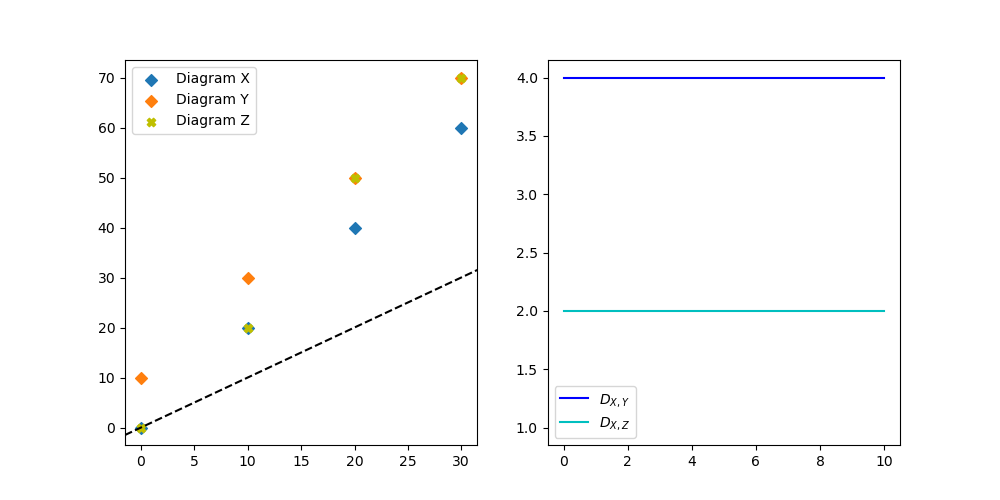

In [7]:
#set up parameters
n_points = 4
#Create artificial persistence diagrams
Dgm1x = np.array([10*x for x in range(0,n_points)])
Dgm1y = np.array([20*x for x in range(0,n_points)])
Dgm2x = np.array([10*x for x in range(0,n_points)])
Dgm2y = np.array([20*x+10*np.floor(x/(n_points/2)) for x in range(0,4)])
Dgm3x = np.array([10*x for x in range(0,n_points)])
Dgm3y = np.array([20*x+10 for x in range(0,n_points)])

Dgm1 = np.array([(Dgm1x[i],Dgm1y[i]) for i in range(0,n_points)])
Dgm2 = np.array([(Dgm2x[i],Dgm2y[i]) for i in range(0,n_points)])
Dgm3 = np.array([(Dgm3x[i],Dgm3y[i]) for i in range(0,n_points)])

#Plot the PDs
f, axs = plt.subplots(1,2, figsize=(10, 5))
ax1 = plt.subplot(121)
plt.scatter(Dgm1x, Dgm1y, marker = 'D', label = "Diagram X")
plt.scatter(Dgm3x, Dgm3y, marker = 'D', label = "Diagram Y")
plt.scatter(Dgm2x, Dgm2y, marker = 'X', c='y', label = "Diagram Z")
plt.axline((0,0),slope=1, c='k', ls='--')
plt.legend(loc="upper left")


#compute the D_{X,Y} values
d_vals = np.linspace(0,n_points,n_points+1)
r_vals12 = [gd.prokhorov_distance(Dgm1, Dgm2, np.array([r])) for r in d_vals]
r_vals13 = [gd.prokhorov_distance(Dgm1, Dgm3, np.array([r])) for r in d_vals]
#Plot the D_{X,Y}
ax2 = plt.subplot(122)
for i in range(1,n_points+1):
    plt.plot((r_vals13[i],r_vals13[i-1]),(i, i), c='b', label = "$D_{X,Y}$")
    plt.plot((r_vals12[i],r_vals12[i-1]),(i, i), c='c', label = "$D_{X,Z}$")
#plt.axline((0,0),slope=1, c='k', ls='--', label = "id")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="lower left")
plt.show()

In [8]:
def getLowerStarTimeSeriesD(x):
    N = x.size
    # Add edges between adjacent points in the time series, with the "distance" 
    # along the edge equal to the max value of the points it connects
    I = np.arange(N-1)
    J = np.arange(1, N)
    V = np.maximum(x[0:-1], x[1::])
    # Add vertex birth times along the diagonal of the distance matrix
    I = np.concatenate((I, np.arange(N)))
    J = np.concatenate((J, np.arange(N)))
    V = np.concatenate((V, x))
    #Create the sparse distance matrix
    D = sparse.coo_matrix((V, (I, J)), shape=(N, N)).tocsr()
    return D

In [9]:
np.random.seed(0)
NSamples = 500
t = np.linspace(0, 50, NSamples)
x1 = 10*(np.cos(0.2*np.pi*t) + 0.1*t)
y1 = x1 + 2*np.random.randn(NSamples)

Dx = getLowerStarTimeSeriesD(x1)
Dy = getLowerStarTimeSeriesD(y1)
Ix1 = ripser.ripser(Dx, distance_matrix=True, maxdim=0)['dgms'][0]
Iy1 = ripser.ripser(Dy, distance_matrix=True, maxdim=0)['dgms'][0]

#Remove point at infinity before bottleneck/wasserstein
Ix1 = Ix1[np.isfinite(Ix1[:, 1]), :]
Iy1 = Iy1[np.isfinite(Iy1[:, 1]), :]
n_points1=len(Ix1)+len(Iy1)
#compute the D_{X,Y} values
d_vals1 = np.linspace(0,n_points1,n_points1+1)
r_vals1 = [gd.prokhorov_distance(Iy1, Ix1, np.array([r])) for r in d_vals1]

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter([p[0] for p in Ix1], [p[1] for p in Ix1], label = 'Diagram X')
plt.scatter([p[0] for p in Iy1], [p[1] for p in Iy1], label = 'Diagram Y')
plt.axline((0,0),slope=1, c='k', ls='--')
plt.legend(loc="lower right")
plt.title("Bottleneck: {}\n $t^2$-Prokhorov: {}".format(gd.bottleneck_distance(Ix1,Iy1), gd.prokhorov_distance(Ix1,Iy1,np.array([0,0,1]))))

np.random.seed(0)
NSamples = 250
t = np.linspace(0, 50, NSamples)
x2 = 10*(np.cos(0.1*np.pi*t) + 0.1*t)
y2 = x2 + 2*np.random.randn(NSamples)

Dx = getLowerStarTimeSeriesD(x2)
Dy = getLowerStarTimeSeriesD(y2)
Ix2 = ripser.ripser(Dx, distance_matrix=True, maxdim=0)['dgms'][0]
Iy2 = ripser.ripser(Dy, distance_matrix=True, maxdim=0)['dgms'][0]

Ix2 = Ix2[np.isfinite(Ix2[:, 1]), :]
Iy2 = Iy2[np.isfinite(Iy2[:, 1]), :]
n_points2=len(Ix2)+len(Iy2)
#compute the D_{X,Y} values
d_vals2 = np.linspace(0,n_points2,n_points2+1)
r_vals2 = [gd.prokhorov_distance(Iy2, Ix2, np.array([r])) for r in d_vals2]

plt.subplot(122)
plt.scatter([p[0] for p in Ix2], [p[1] for p in Ix2], label = 'Diagram W')
plt.scatter([p[0] for p in Iy2], [p[1] for p in Iy2], label = 'Diagram Z')
plt.axline((0,0),slope=1, c='k', ls='--')
plt.legend(loc="lower right")
plt.title("Bottleneck: {}\n $t^2$-Prokhorov: {}".format(gd.bottleneck_distance(Ix2,Iy2), gd.prokhorov_distance(Ix2,Iy2,np.array([0,0,1]))))
plt.show()

NameError: name 'ripser' is not defined

/tmp/ipykernel_5690/1713615080.py:16: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(t, (W_p**p-t**p*(len(Ix1)+len(Iy1)))/(dB**p-t**p), c=cols[p-1], label ="$p = {}$".format(p))
/tmp/ipykernel_5690/1713615080.py:16: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(t, (W_p**p-t**p*(len(Ix1)+len(Iy1)))/(dB**p-t**p), c=cols[p-1], label ="$p = {}$".format(p))
/tmp/ipykernel_5690/1713615080.py:16: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(t, (W_p**p-t**p*(len(Ix1)+len(Iy1)))/(dB**p-t**p), c=cols[p-1], label ="$p = {}$".format(p))
/tmp/ipykernel_5690/1713615080.py:16: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(t, (W_p**p-t**p*(len(Ix1)+len(Iy1)))/(dB**p-t**p), c=cols[p-1], label ="$p = {}$".format(p))


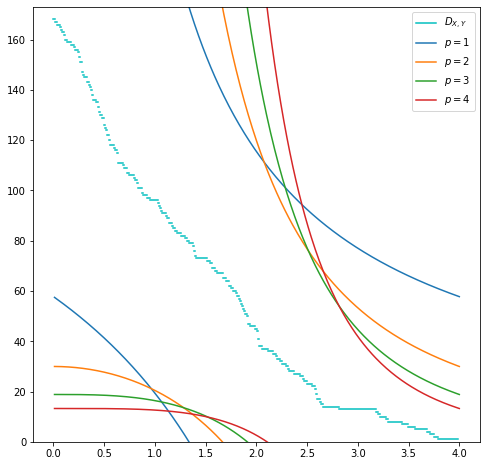

In [10]:
#Plot the D_{X,Y}
f,ax = plt.subplots(figsize=(8, 8))
for i in range(1,n_points1+1):
    ax.plot((r_vals1[i],r_vals1[i-1]),(i, i), c='c', label='$D_{X,Y}$')
#for i in range(1,n_points2+1):    
#    plt.plot((r_vals2[i],r_vals2[i-1]),(i, i), c='b', label = '$D_{W,Z}$')

#Plot monomials
t = np.linspace(0.01,4,400)
Dt = np.array([gd.bottleneck_profile(Ix1,Iy1,t0) for t0 in t])
dB = gd.bottleneck_distance(Ix,Iy)
cols = ["tab:blue", "tab:orange", "tab:green", "tab:red"]
for p in range(1,5):
    W_p = gd.hera.wasserstein_distance(Ix1, Iy1, order = p, internal_p = float("inf"))
    #ax.axline((0,W_p), slope=0, label = "$W_{}^{}$".format(p,p), c=cols[p-1])
    ax.plot(t, (W_p**p-t**p*(len(Ix1)+len(Iy1)))/(dB**p-t**p), c=cols[p-1], label ="$p = {}$".format(p))
    ax.plot(t, (W_p**p)/(t**p), c=cols[p-1])
    #ax.axline((0,0), slope = (len(Ix1)+len(Iy1))**(1/p), ls="--", c="k")
    #ax.axline((0,Dt[0]**(1/p)*dB), (dB,0), ls="--", c="k")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper right")
ax.set_ylim((0,len(Ix1)+len(Iy1)))
plt.show()

In [11]:
r_vals1

[3.9889163970947266,
 3.7889116667211056,
 3.752490997314453,
 3.7123451232910156,
 3.6838111877441406,
 3.565761059522629,
 3.4895745515823364,
 3.438422203063965,
 3.299041748046875,
 3.2780799865722656,
 3.2190723419189453,
 3.1946754455566406,
 3.181367874145508,
 2.8164844512939453,
 2.6588058471679688,
 2.640997886657715,
 2.623887062072754,
 2.598855972290039,
 2.5957088470458984,
 2.5868759155273438,
 2.5837908685207367,
 2.573826789855957,
 2.552432060241699,
 2.499011993408203,
 2.4736671447753906,
 2.458587646484375,
 2.4303383827209473,
 2.3724066019058228,
 2.3259153366088867,
 2.3102283477783203,
 2.29422664642334,
 2.2530288696289062,
 2.2304840087890625,
 2.1989682614803314,
 2.1978530883789062,
 2.1650753021240234,
 2.1158480644226074,
 2.054332733154297,
 2.0297842025756836,
 2.0258028507232666,
 2.021688938140869,
 2.016958475112915,
 2.013527750968933,
 2.0128278732299805,
 2.0058650970458984,
 1.9822750091552734,
 1.9369564056396484,
 1.921055793762207,
 1.91588020

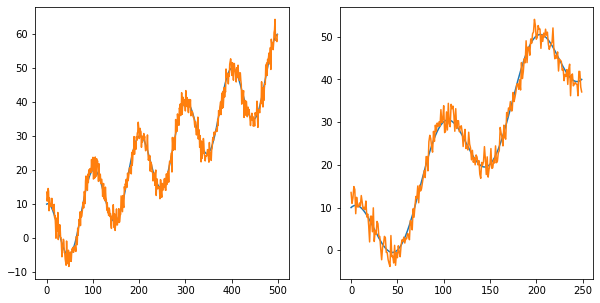

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(x1)
plt.plot(y1)
plt.subplot(122)
plt.plot(x2)
plt.plot(y2)
plt.show()

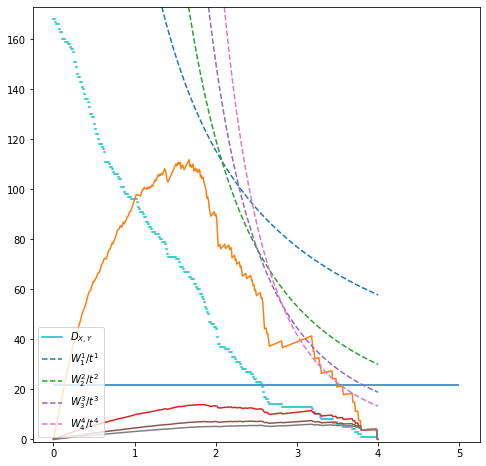

In [ ]:
import gudhi.hera
t = np.linspace(1,4,301)
r = np.linspace(0,4,401)
bp = np.array([gd.bottleneck_profile(Ix1, Iy1,r0) for r0 in r])
plt.figure(figsize=(8, 8))
axes = plt.gca()
for i in range(1,n_points1+1):
    plt.plot((r_vals1[i],r_vals1[i-1]),(i, i), c='c', label='$D_{X,Y}$')
    #plt.plot((r_vals1[i],r_vals1[i-1]),(r_vals1[i]*np.sqrt(i), r_vals1[i-1]*np.sqrt(i)), c='b', label='$\varepsilon \sqrt{D_{X,Y}(\varepsilon)}$')
for p in range (1,5):
    W_p = gudhi.hera.wasserstein_distance(Ix1, Iy1, order = p, internal_p = float("inf"))
    plt.plot(t,(W_p**p)/(t**p), ls='--', label = '$W_{}^{}/t^{}$'.format(p,p,p))
    
    plt.plot(r,r*(bp**(1/p)))
plt.hlines(gudhi.hera.wasserstein_distance(Ix1, Iy1, order = 2, internal_p = float("inf")),0,5)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="lower left")
axes.set_ylim([-1,n_points1])
plt.show()

In [11]:
dgms = [Ix1, Iy1, Ix2, Iy2]
names = ["X","Y","W","Z"]
cols = ['b','c','k','r']
plt.figure(figsize=(8, 8))
j=1
for dgm in dgms:
    n_points = len(dgm)
    d_vals = np.linspace(0,n_points,n_points+1)
    r_vals = [gd.prokhorov_distance(dgm, np.array([]), np.array([r])) for r in d_vals]
    for i in range(1,n_points+1):
        plt.plot((r_vals[i],r_vals[i-1]),(i, i), c=cols[j-1], label='$D_{%s,\emptyset}$' %names[(j-1)])
    j = j+1
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper right")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:
#Dgm 1 has two off-diagonal points
dgm1 = np.array([[10,20,30,40],[25,35,45,55]])
n_iter = 100
n_samples = 100
n_points = n_samples+4
W12 = [None] * n_iter
P12 = [None] * n_iter
r_vals = [None] * n_iter
for i in range(0,n_iter):
    dgm2 = np.append([[6,16,26,36],[29,39,49,59]], [np.linspace(0,60,n_samples)-np.abs(np.random.normal(0,1,n_samples)), np.linspace(0,60,n_samples)+np.abs(np.random.normal(0,1,n_samples))], axis = 1)
    d_vals = np.linspace(0,n_points,n_points+1)
    r_vals[i] = [gd.prokhorov_distance(dgm1.T, dgm2.T, np.array([r])) for r in d_vals]
    W12[i] = gd.hera.wasserstein_distance(dgm1.T, dgm2.T, order = 1, internal_p = float("inf"))
    P12[i] = gd.prokhorov_distance(dgm1.T, dgm2.T, np.array([0,1]))
fig = plt.figure(figsize = (10,10))
plt.subplot(221)
plt. scatter(dgm1[0],dgm1[1])
plt. scatter(dgm2[0],dgm2[1])
r_mean12 = np.mean(r_vals, axis = 0)
r_max12 = np.max(r_vals, axis=0)
r_min12 = np.min(r_vals, axis=0)
r_std12 = np.std(r_vals, axis = 0)
plt.subplot(222)
for i in range(1,n_points+1):
    plt.plot((r_min12[i],r_min12[i-1]),(i, i), c='k', ls = ':', label='min $D_{1,2}$')
    plt.plot((r_mean12[i-1]-r_std12[i-1],r_mean12[i-1]+r_std12[i-1]),(i, i), c='orange', label='$\sigma$')
    plt.plot((r_mean12[i]-r_std12[i],r_mean12[i]+r_std12[i]),(i, i), c='orange', label='$\sigma$')
    plt.plot((r_mean12[i],r_mean12[i-1]),(i, i), c='c', linewidth = 3, label='mean $D_{1,2}$')
    plt.plot((r_max12[i],r_max12[i-1]),(i, i), c='k', ls = ':', label='max $D_{1,2}$')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper right")

#Dgm 3 has two off-diagonal points

dgm3 = np.array([[20,30],[35,45]])
n_iter = 100
n_samples = 102
n_points = n_samples+2
r_vals = [None] * n_iter
W34 = [None] * n_iter
P34 = [None] * n_iter
for i in range(0,n_iter):
    dgm4 = np.append([[16,26],[39,49]], [np.linspace(0,60,n_samples)-np.abs(np.random.normal(0,1,n_samples)), np.linspace(0,60,n_samples)+np.abs(np.random.normal(0,1,n_samples))], axis = 1)
    d_vals = np.linspace(0,n_points,n_points+1)
    r_vals[i] = [gd.prokhorov_distance(dgm3.T, dgm4.T, np.array([r])) for r in d_vals]
    W34[i] = gd.hera.wasserstein_distance(dgm3.T, dgm4.T, order = 1, internal_p = float("inf"))
    P34[i] = gd.prokhorov_distance(dgm3.T, dgm4.T, np.array([0,1]))
plt.subplot(223)
plt. scatter(dgm3[0],dgm3[1])
plt. scatter(dgm4[0],dgm4[1])
r_mean34 = np.mean(r_vals, axis = 0)
r_max34 = np.max(r_vals, axis=0)
r_min34 = np.min(r_vals, axis=0)
r_std34 = np.std(r_vals, axis = 0)
plt.subplot(224)
for i in range(1,n_points+1):
    plt.plot((r_min34[i],r_min34[i-1]),(i, i), c='k', ls = ':', label='min $D_{3,4}$')
    plt.plot((r_mean34[i-1]-r_std34[i-1],r_mean34[i-1]+r_std34[i-1]),(i, i), c='orange', label='$\sigma$')
    plt.plot((r_mean34[i]-r_std34[i],r_mean34[i]+r_std34[i]),(i, i), c='orange', label='$\sigma$')
    plt.plot((r_mean34[i],r_mean34[i-1]),(i, i), c='c', linewidth = 3, label='mean $D_{3,4}$')
    plt.plot((r_max34[i],r_max34[i-1]),(i, i), c='k', ls = ':', label='max $D_{3,4}$')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper right")

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<IPython.core.display.Javascript object>


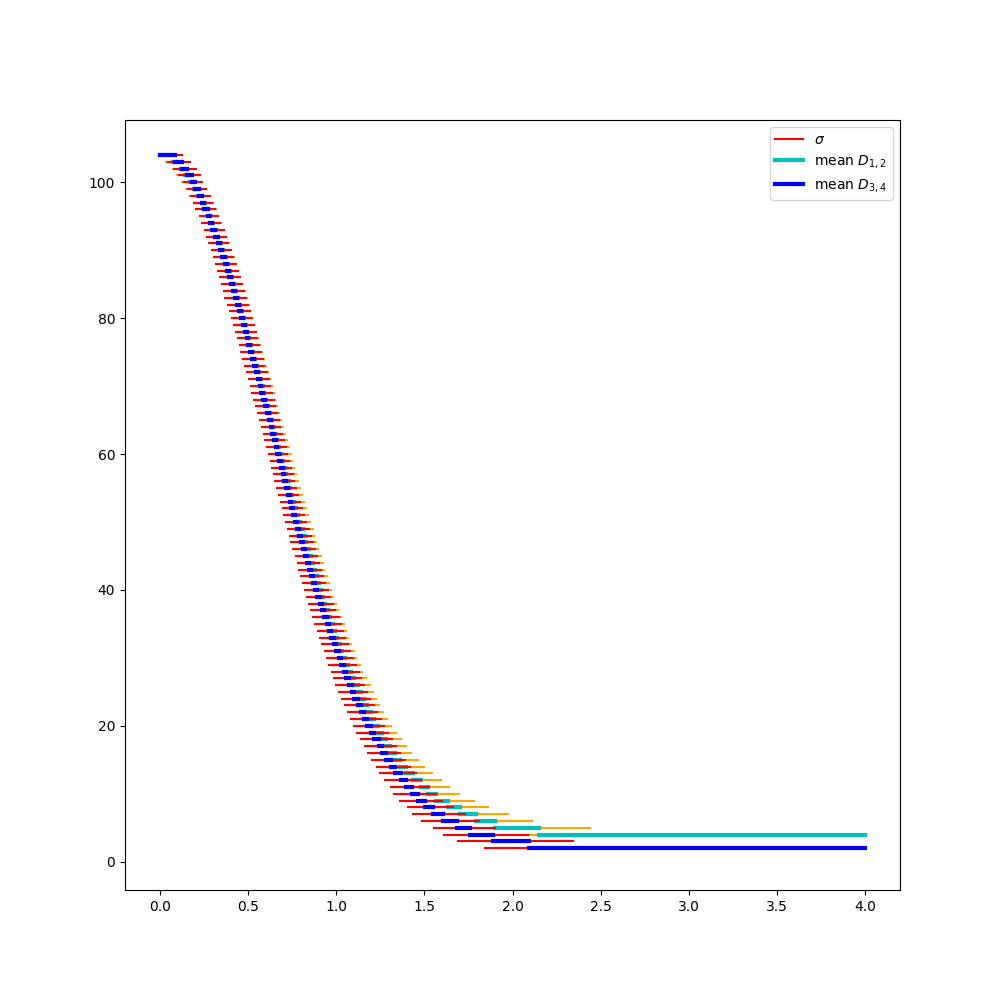

In [84]:
plt.figure(figsize = (10,10))
n_points = 104
for i in range(1,n_points+1):    
    plt.plot((r_mean12[i-1]-r_std12[i-1],r_mean12[i-1]+r_std12[i-1]),(i, i), c='orange', label='$\sigma$')
    plt.plot((r_mean12[i]-r_std12[i],r_mean12[i]+r_std12[i]),(i, i), c='orange', label='$\sigma$')
    plt.plot((r_mean12[i],r_mean12[i-1]),(i, i), c='c', linewidth = 3, label='mean $D_{1,2}$')
for i in range(1,n_points+1):
    plt.plot((r_mean34[i-1]-r_std34[i-1],r_mean34[i-1]+r_std34[i-1]),(i, i), c='red', label='$\sigma$')
    plt.plot((r_mean34[i]-r_std34[i],r_mean34[i]+r_std34[i]),(i, i), c='red', label='$\sigma$')
    plt.plot((r_mean34[i],r_mean34[i-1]),(i, i), c='b', linewidth = 3, label='mean $D_{3,4}$')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper right")
plt.show()

In [20]:
print("W_1(dgm1, dgm2) = {}".format(np.mean(W12)))
print("W_1(dgm3, dgm4) = {}".format(np.mean(W34)))
print("d_P(dgm1, dgm2) = {}".format(np.mean(P12)))
print("d_P(dgm3, dgm4) = {}".format(np.mean(P34)))

W_1(dgm1, dgm2) = 216.21376416795206
W_1(dgm3, dgm4) = 213.94032465121597
d_P(dgm1, dgm2) = 4.0
d_P(dgm3, dgm4) = 3.63361302865619


<IPython.core.display.Javascript object>


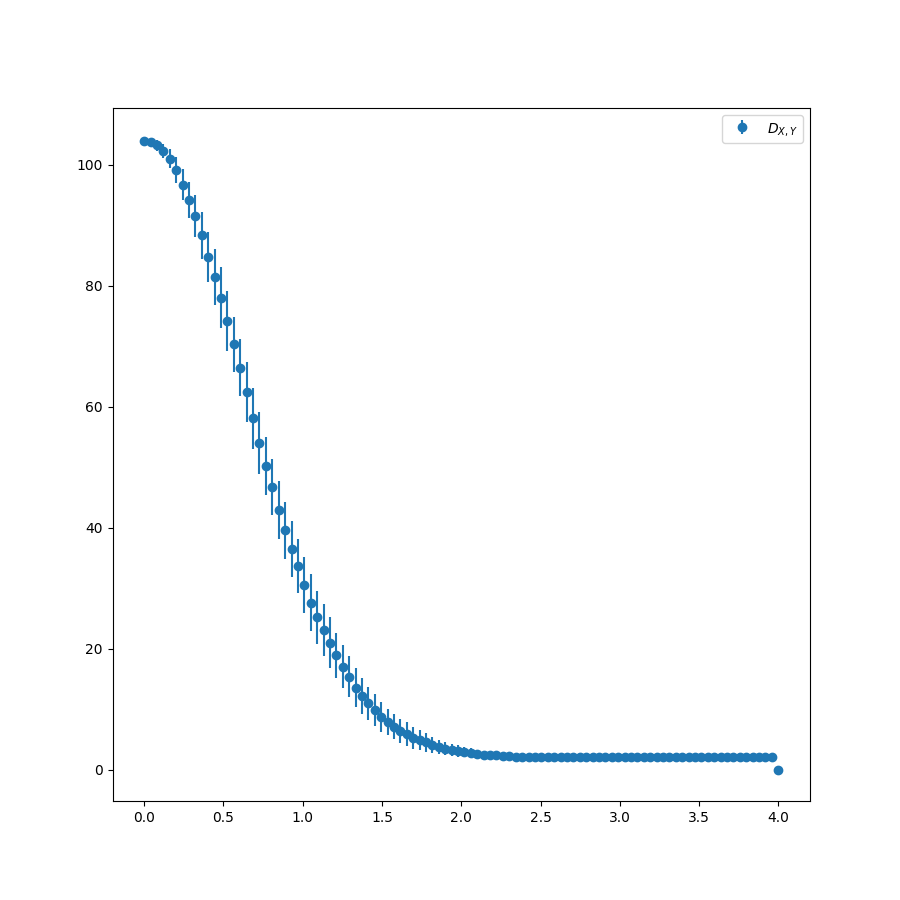

In [85]:
ts = np.linspace(0,4,100)
Dmean = np.array([np.mean([D(r,t) for r in r_vals]) for t in ts])
Dstd = np.array([np.std([D(r,t) for r in r_vals]) for t in ts])
plt.figure(figsize = (9,9))

plt.errorbar(ts,Dmean,Dstd, linestyle='None', marker='o', label = "$D_{X,Y}$")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper right")

plt.show()

AttributeError: module 'gudhi' has no attribute 'bottleneck_profile'